In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction

In [2]:
Nx=100
Ny=5

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




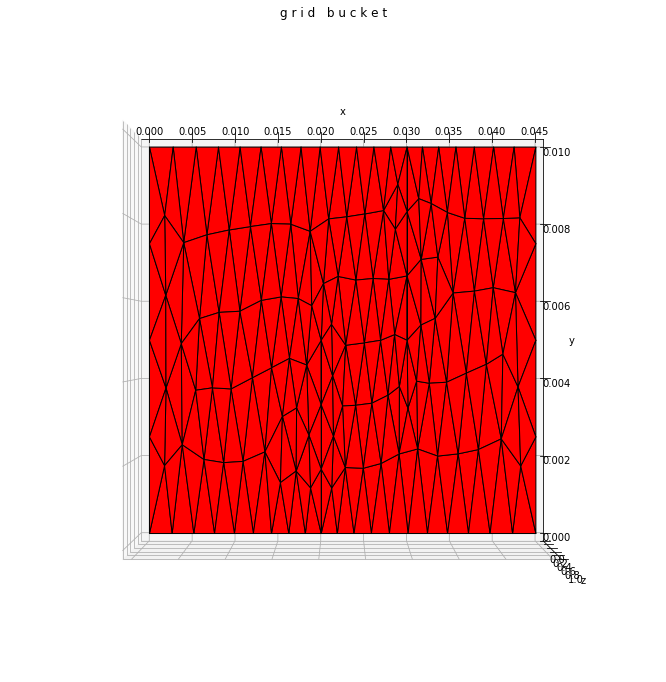

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [5]:
parameter_flow={"aperture":1e-3,
           "fracture_perm":1e-20,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           #"perm":1.0e-9,
           #"perm":2e-10,
           "perm":1e-10,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[15.0,0.0],
          #"bc_value":[5.0e-9,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

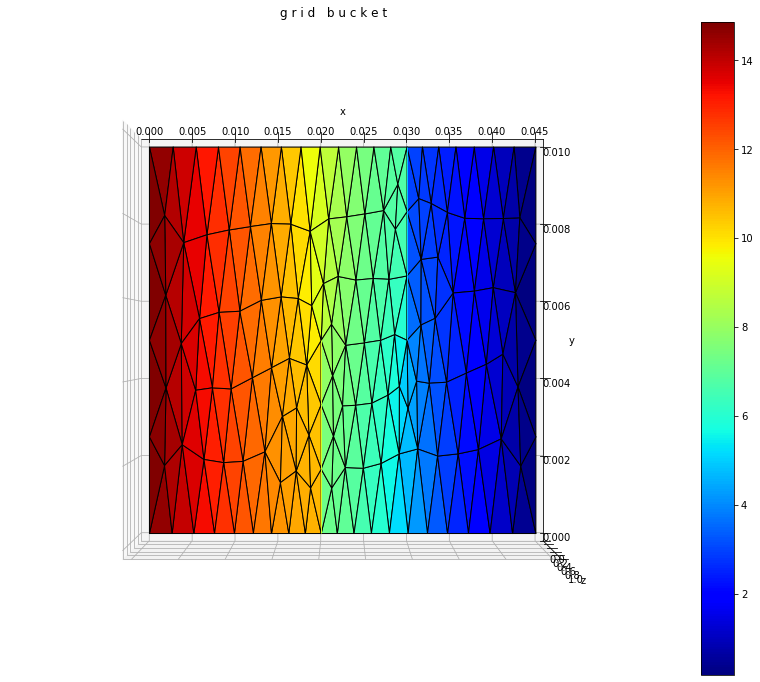

In [6]:
flow=Flow(gb,domain,parameter_flow)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [7]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [8]:
Ca_value=[0.0,0.0]
Ca_type=['dir','dir']
CaSiO3_value=[0.0,0.0]
CaSiO3_type=['dir','dir']
Ca="Ca"
CaSiO3="CaSiO3"

In [9]:
reaction_data={"temperature":423,
       "A":1.9e-2,
       #"rate_const":0.00446,
       "rate_const":0.0005,
       "E":4700,
       "R":8.314,
       "K_eq":10e9,
       "ph":3.5,
       "mass_weight":0.3*1.0}
reaction=Reaction(reaction_data)
reaction.set_const_rate()
print(reaction.const_rate)

2.4964205820053154e-06


In [10]:
transport.set_data(Ca_value,Ca_type,Ca)
transport.get_flux(Ca)
transport.discretize(Ca)
lhs_Ca,rhs_source_adv_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(Ca)
#ciao?1



P0_flux
[[ 2.38565280e-08  2.47597002e-08  2.22029148e-08  1.98978046e-08
   2.46491439e-08  2.45225764e-08  1.87715660e-08  3.45501023e-08
   2.31626433e-08  2.79600960e-08  4.19316043e-08  3.03115865e-08
   3.35839322e-08  2.39786530e-17  2.76538588e-08  2.70910180e-08
   2.26360754e-17  2.39787550e-17  9.97076961e-09  3.50581472e-08
   1.41525804e-08  3.32204274e-08  2.65843018e-08  3.78615976e-08
   2.88695949e-08  3.40962836e-17  2.67578999e-08  4.30180218e-08
   2.64490997e-08  3.65211202e-08  2.08357739e-08  2.58900207e-08
   2.90940084e-08  4.08367541e-08  1.69048312e-08  1.60859909e-08
   1.52236261e-08  2.25488565e-08  3.40050000e-08  1.51103319e-08
   2.57825786e-08  2.90964066e-08  2.64719002e-08  2.79343334e-08
   2.56092342e-08  1.88596879e-08  3.12006074e-08  2.59649311e-08
   2.65855745e-08  3.80738218e-08  2.06735335e-08  3.30255775e-08
   2.48702772e-08  4.31672559e-08  2.64465753e-08  3.47147180e-08
   3.77827637e-08  4.37062912e-08  2.47825372e-08  3.73183482e-08
  

/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


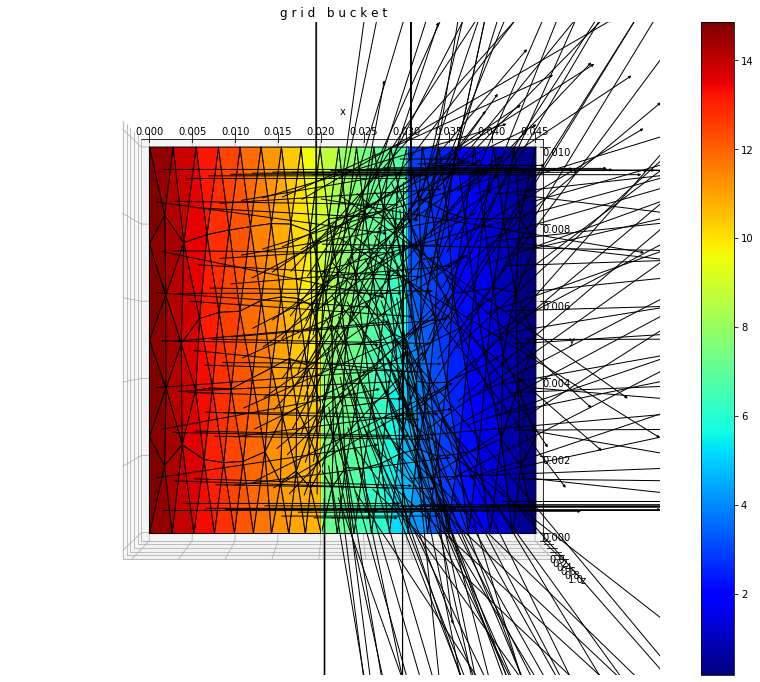

In [11]:
## to export the flux
key='Ca'
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

for g,d in gb:
    print("P0_flux")
    print(d[pp.STATE]["P0_flux"])

for g,d in gb:
    print("pressure")
    print(d[pp.STATE]["pressure"])
    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=1000000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

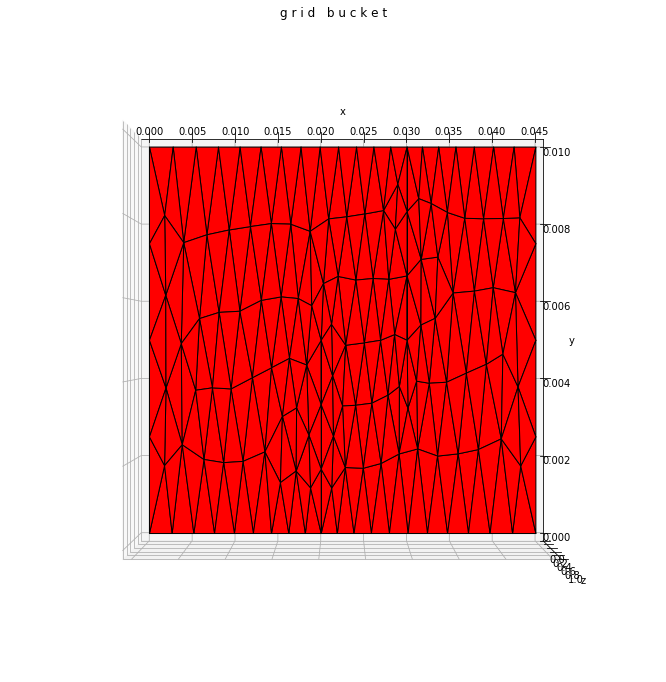

In [12]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}


# Generate a mixed-dimensional mesh
gb1= network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [13]:
parameter={"aperture":1e-3,
           "fracture_perm":1e-20,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           #"perm":1.0e-9,
           #"perm":2e-10,
           "perm":1e-10,
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          #"bc_value":[10.0,0.0],
          #"bc_value":[5.0e-9,0.0],
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

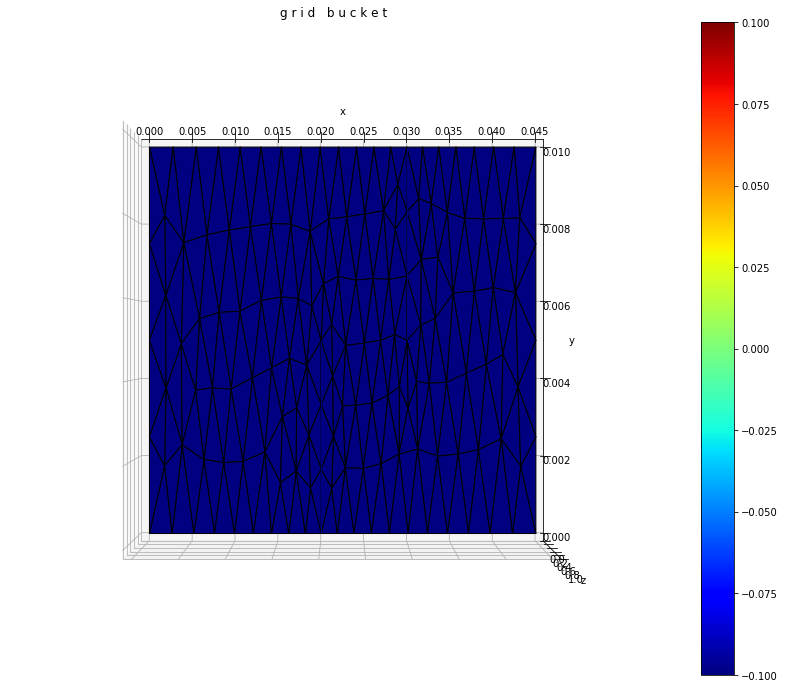

In [14]:
flow=Flow(gb1,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [15]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_CaSiO3=Transport(gb1,domain,parameter)

In [16]:
transport_CaSiO3.set_data(CaSiO3_value,CaSiO3_type,CaSiO3)
transport_CaSiO3.get_flux(CaSiO3)    
transport_CaSiO3.discretize(CaSiO3)
lhs_CaSiO3,rhs_source_adv_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport_CaSiO3.get_transport_lhs_rhs(CaSiO3)

In [17]:
save_every = 100
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))

# Initial condition
tracer1 = np.zeros(rhs_source_adv_Ca.size)
assembler_Ca.distribute_variable(
    tracer1, variable_names=[Ca,transport.mortar_variable+Ca]
)

#tracer2 = 16.7504*np.ones(rhs_source_adv_CaSiO3.size)
tracer2=np.zeros(rhs_source_adv_CaSiO3.size)
l=0
for g,d in gb:
    if(g.dim == gb.dim_max()):
        for j in range(g.num_cells):
            tracer2[j]=58.6264
        l=g.num_cells
    else:
        for i in range(l,l+g.num_cells,1):
            print("i")
            print(i)
            tracer2[i]=251231
        l+=g.num_cells

assembler_CaSiO3.distribute_variable(
    tracer2, variable_names=[CaSiO3,transport.mortar_variable+CaSiO3]
)

# Exporter
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="Ca")
export_field1 = ["Ca"]
IEsolver_Ca = sps.linalg.factorized(lhs_Ca)

exporter2= pp.Exporter(gb1, file_name="CaSiO3", folder_name="CaSiO3")
export_field2 = ["CaSiO3"]
IEsolver_CaSiO3 = sps.linalg.factorized(lhs_CaSiO3)

i
246
i
247
i
248
i
249
i
250
i
251


/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


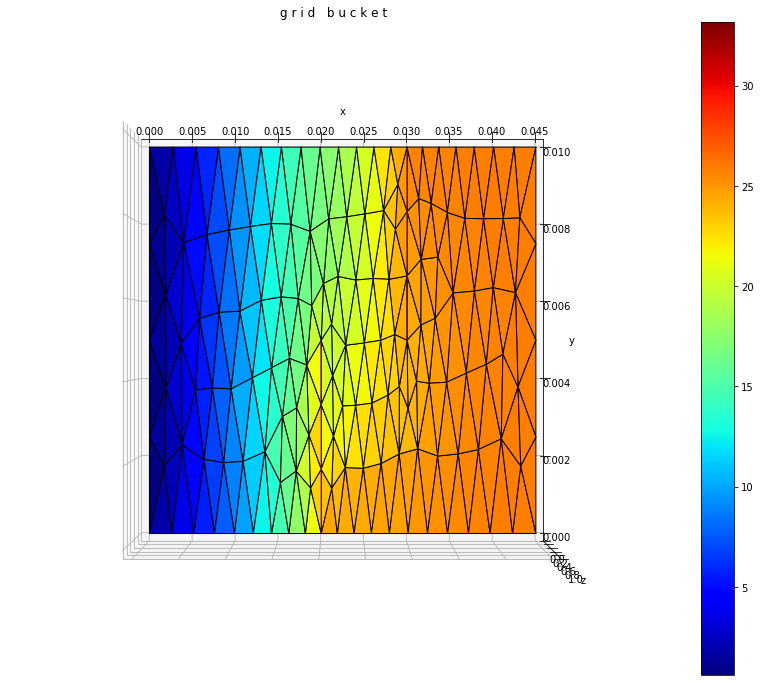

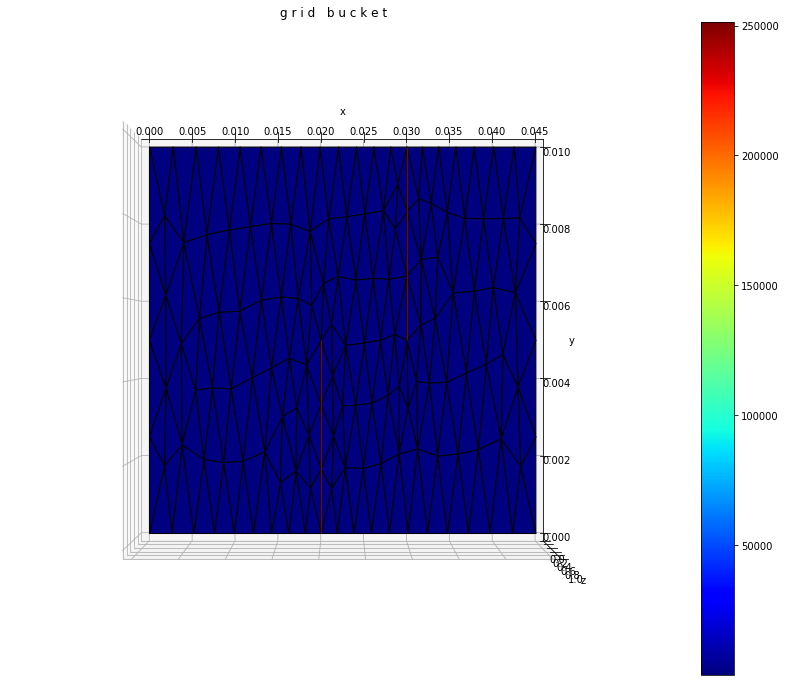

In [18]:
rd=np.zeros(tracer1.size)
#for i in range(10):
#for i in range(n_steps):


for i in range(1,n_steps+1,1):
    rd=reaction.compute_rd(tracer1,rd)
    if np.isclose((i-1) % save_every, 0):
            exporter1.write_vtu(export_field1, time_step=int((i-1) // save_every))
            exporter2.write_vtu(export_field2, time_step=int((i-1) // save_every))
            #for g,d in gb:
                #print("Ca")
                #print(d[pp.STATE]["Ca"])
            #for g,d in gb1:
                #print("CaSiO3")
                #print(d[pp.STATE]["CaSiO3"])
            #print("FINE")
            #print("rd")
            #print(rd)
    
    #rd=reaction.compute_rd(tracer1,rd)
    tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca+rhs_mass_Ca*rd*tracer2*parameter["time_step"])
    tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3-rhs_mass_CaSiO3*rd*tracer2*parameter["time_step"])
    #tracer1 = IEsolver_Ca(rhs_mass_Ca * tracer1 + rhs_source_adv_Ca)
    #tracer2 = IEsolver_CaSiO3(rhs_mass_Ca * tracer2 + rhs_source_adv_CaSiO3)
    
    
    assembler_Ca.distribute_variable(
        tracer1,
        variable_names=[Ca,transport.mortar_variable+Ca],
    )
    assembler_CaSiO3.distribute_variable(
        tracer2,
        variable_names=[CaSiO3,transport.mortar_variable+CaSiO3],
    )
    #print("tracer1")
    #print(tracer1)
    
exporter1.write_vtu(export_field1, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
    
exporter2.write_vtu(export_field2, time_step=(n_steps // save_every))
time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)
exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
transport.plot_tracer(Ca)
transport_CaSiO3.plot_tracer(CaSiO3)

In [19]:
print(transport.mortar_variable)

mortar_tracer


In [20]:
for g,d in gb:
    print("k_size:")
    print(d[pp.PARAMETERS]["flow"]["second_order_tensor"].values.size)
    print("Ca_size:")
    print(d[pp.STATE]["Ca"].size)
    print("fine")

k_size:
2214
Ca_size:
246
fine
k_size:
27
Ca_size:
3
fine
k_size:
27
Ca_size:
3
fine


In [21]:
a=4
for i in range(4):
    print(i)
print("fine")
for i in range(a,7,1):
    print(i)

0
1
2
3
fine
4
5
6


In [22]:
for g,d in gb1:
    print(d[pp.STATE]["CaSiO3"])

[28.6531865  29.04973289 32.72864226 32.42581605 28.17796821 27.64155632
 29.49636018 29.78094057 32.74055295 32.60640442 30.12223414 31.31662234
 32.61423462 32.471058   31.22918818 27.83008591 31.71826189 32.51276527
 32.4326128  32.5772186  31.57097059 31.05481816 31.86013884 32.65398704
 31.3251918  32.62181037 27.46792793 30.2767183  32.74444403 29.70498754
 32.71021126 27.35460394 32.73668837 32.59053347 31.97871892 30.33478422
 32.55866027 31.81378586 30.72097898 32.59566275 32.07342947 32.47993839
 27.9559064  32.74717461 32.76215565 29.96836807 30.98695541 32.71242031
 32.75166467 30.22413949 32.63444475 29.48586455 31.71687451 32.48312959
 26.01482574 32.68186947 30.85047803 32.44502632 32.74954714 30.4835178
 32.51501889 26.37628742 32.70422509 29.33513071 32.68706227 32.5598849
 25.11624409 27.26311858 32.66103389 26.4494542  29.56377901 31.74691174
 28.98507427 29.98332886 32.18875817 32.62535804 25.28975609 32.53737317
 32.48190315 29.0928536  32.75430309 31.52360385 30.6